# Chapter 9 Plotting and Visualization

Making informative visualizations is one of the most important tasks in data analysis. It may serve the purpose for:

- Data exploration
- Getting ideas for building models
- Present findings

Let's start with matplotlib, a widely-used Python library for making plots.

In [35]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Exercise: Exploring NYC Taxi Data
Please download train.zip from [Kaggle](https://www.kaggle.com/c/nyc-taxi-trip-duration/data)

In [39]:
# Extract files
# import zipfile
# if not os.path.exists("Data"):
#     os.mkdir("Data")
with zipfile.ZipFile("Data/train.zip", "r") as file:
    file.printdir()
    file.extractall("Data/nyctaxi")

In [40]:
taxidata = pd.read_csv("Data/nyctaxi/train.csv", delimiter=",")

In [41]:
taxidata.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [42]:
print("Shape:", taxidata.shape)

Shape: (1458644, 11)


In [43]:
print("Feature names:", ", ".join(taxidata.columns))

Feature names: id, vendor_id, pickup_datetime, dropoff_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, trip_duration


In [44]:
print("Data types:", taxidata.dtypes)

Data types: id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


In [45]:
# Change the data type of datetime columns
taxidata['pickup_datetime'] = taxidata['pickup_datetime'].astype(
    np.datetime64)

In [46]:
taxidata['dropoff_datetime'] = taxidata['dropoff_datetime'].astype(
                                np.datetime64)

In [47]:
print("Data Types:", taxidata.dtypes)

Data Types: id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object


In [48]:
# Missing values?
pd.isnull(taxidata).sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [49]:
# Look at statistics of numerical features
taxidata.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## Visualization Task 1: Distribution of each column

**Vender IDs**

Text(0, 0.5, 'Frequency')

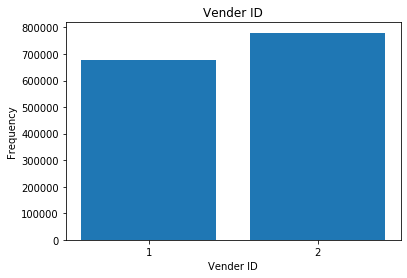

In [50]:
# plt.hist(taxidata['vendor_id'])
freqs = taxidata['vendor_id'].value_counts()
# plt.bar(freqs.index, freqs.values)
# plt.title("Vendor ID")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Vender ID")
ax.bar(freqs.index, freqs.values)
ax.set_xticks([1, 2])
ax.set_xlabel("Vender ID")
ax.set_ylabel("Frequency")

Text(0.5, 1.0, 'Vender ID = 2')

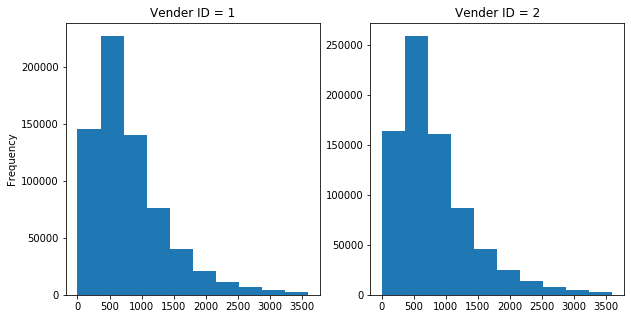

In [51]:
# Extract trips with Vender ID 1.
index_id1 = (taxidata['vendor_id'] == 1)
taxidata_id1 = taxidata[index_id1]

# Extract trips with Vender ID 2.
index_id2 = (taxidata['vendor_id'] == 2)
taxidata_id2 = taxidata[index_id2]

# Show the historgram of trip duration
# plt.hist(taxidata_id1['trip_duration'], range=(0, 3600)) # need to remove the outliners first
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(taxidata_id1['trip_duration'], range=(0, 3600))
ax1.set_title("Vender ID = 1")
ax1.set_ylabel("Frequency")
ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(taxidata_id2['trip_duration'], range=(0, 3600))
ax2.set_title("Vender ID = 2")

Conclusion: Vender ID does not influence trip duration.

**Passenger count**

In [52]:
taxidata['passenger_count'].value_counts().sort_index()

0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: passenger_count, dtype: int64

There are 60 trips with no passenger. We should remove those instances from the data frame.

In [53]:
# Remove rows where passenger count is zero
index = (taxidata['passenger_count'] != 0)
# Show the selected rows
# df = taxidata[index]
# df

# Remove these rows from taxidata
taxidata_1 = taxidata[index]
index_1 = (taxidata_1['passenger_count'] == 0)
taxidata_1[index_1].shape

# Overwrite taxidata with taxidata_1
taxidata = taxidata_1
taxidata.shape

(1458584, 11)

**Flag**

In [54]:
# What are the values in this column?
print(set(taxidata['store_and_fwd_flag']))

# What are the frequencies?
print(taxidata['store_and_fwd_flag'].value_counts())

# Compare the histogram of trip duration for Yes and No (HOMEWORK #1)


{'N', 'Y'}
N    1450542
Y       8042
Name: store_and_fwd_flag, dtype: int64


**Trip duration**

In [55]:
# Investigate outliers

# Extract trips longer than 10 hours
# taxidata_long = taxidata[taxidata['trip_duration'] > 36000]
# taxidata_long.head(10)

# Extract trips shorter than 10 seconds
# taxidata_short = taxidata[taxidata['trip_duration'] < 60]
# print(taxidata_short.shape)
# taxidata_short.sample(10)

# Remove trips whose duration is longer than 7200 or less than 60
index = (taxidata['trip_duration'] >= 60) & (taxidata['trip_duration'] < 7200) 
# & symbol performs element-wise "and" operation for two lists
taxidata = taxidata[index]
print("Min:", taxidata['trip_duration'].min())
print("Max:", taxidata['trip_duration'].max())
print("Shape:", taxidata.shape)

Min: 60
Max: 7191
Shape: (1447779, 11)


In [56]:
list1 = np.array([True, True, False, False])
list2 = np.array([True, False, True, False])
list1 & list2

array([ True, False, False, False])

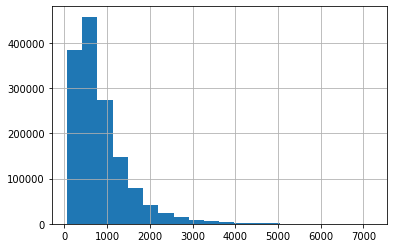

In [57]:
# plt.hist(taxidata['trip_duration'], bins=20)
taxidata['trip_duration'].hist(bins=20)

**Pick-up and drop-off datetime**

/Users/cloudburst/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


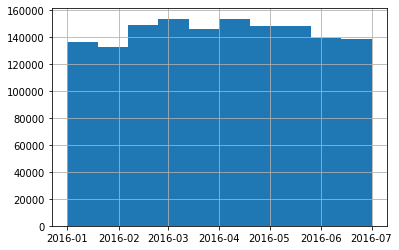

In [58]:
taxidata['pickup_datetime'].hist()

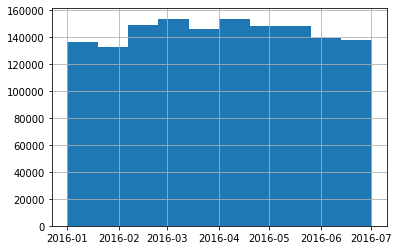

In [59]:
taxidata['dropoff_datetime'].hist()

**Longitudes and Latitudes**

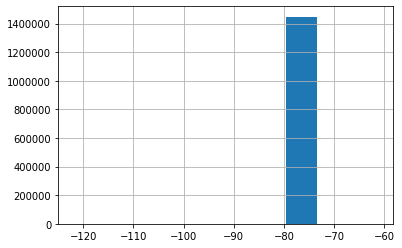

In [60]:
# Longitudes:
taxidata['pickup_longitude'].hist()

In [61]:
# A few outliers make the histogram not informational.
# Let's look at some extreme instances.

# index = (taxidata['pickup_longitude'] < -80)
# taxidata_temp = taxidata[index]
# taxidata_temp.head(10)

# index = (taxidata['pickup_longitude'] > -70)
# taxidata_temp = taxidata[index]
# taxidata_temp.head()
# taxidata_temp.shape

# Remove instances whose pickup longitude is < -80 or > -70
index = (taxidata['pickup_longitude'] < -74.1) | (taxidata['pickup_longitude'] > -73.7)
taxidata1 = taxidata[~index]
taxidata1.shape

(1447565, 11)

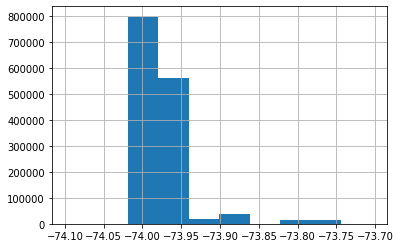

In [62]:
# Plot the histogram again
taxidata1['pickup_longitude'].hist()

In [63]:
taxidata = taxidata1

In [64]:
taxidata['pickup_latitude'].min()

40.22580337524415

In [65]:
# Remove the bottom 0.001% data for pickup_latitude
lower_limit = np.percentile(taxidata['pickup_latitude'], 0.002)
print(lower_limit)
index1 = (taxidata['pickup_latitude'] < lower_limit)
taxidata_temp = taxidata[index1]
print(taxidata_temp.shape)
taxidata_temp.head()

40.57657102905274
(29, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
47554,id0367149,2,2016-01-09 14:58:08,2016-01-09 15:13:20,1,-74.079620,40.449749,-74.062263,40.444698,N,912
55362,id2566010,1,2016-06-25 09:52:58,2016-06-25 10:08:39,1,-73.998886,40.572735,-73.950859,40.596786,N,941
61068,id3369460,1,2016-03-12 16:46:39,2016-03-12 16:52:15,1,-73.749413,40.525162,-73.748505,40.525509,N,336
65755,id2154076,2,2016-02-18 20:33:55,2016-02-18 20:41:13,1,-73.995270,40.551376,-74.004272,40.552326,N,438
73032,id2255271,2,2016-01-16 10:03:02,2016-01-16 10:12:44,1,-74.069733,40.433842,-74.082153,40.441662,N,582


In [66]:
# Remove the top 0.001% of data
upper_limit = np.percentile(taxidata['pickup_latitude'], 99.999)
print(upper_limit)
index2 = (taxidata['pickup_latitude'] > upper_limit)
taxidata_temp = taxidata[index2]
print(taxidata_temp.shape)
taxidata_temp.head()

40.98722946136462
(15, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
186174,id1367238,1,2016-06-20 11:20:13,2016-06-20 11:37:49,1,-73.774055,41.157372,-73.705620,41.071087,N,1056
219212,id0686057,1,2016-05-25 17:57:25,2016-05-25 17:58:26,1,-73.724586,41.106907,-73.724586,41.106907,N,61
613001,id0210104,1,2016-03-11 19:30:58,2016-03-11 19:33:16,1,-73.804680,41.042744,-73.804657,41.042740,N,138
693620,id0459122,1,2016-06-06 21:55:39,2016-06-06 21:56:56,1,-73.754311,40.991917,-73.754311,40.991917,N,77
739380,id1013417,1,2016-03-25 00:48:56,2016-03-25 00:50:01,1,-73.809433,40.987995,-73.809433,40.987995,N,65


In [67]:
# Remove data
taxidata = taxidata[(~index1)&(~index2)]
taxidata.shape

(1447521, 11)

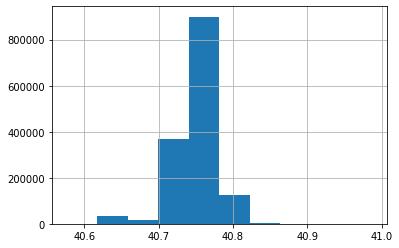

In [68]:
taxidata['pickup_latitude'].hist()

(40.6, 40.9)

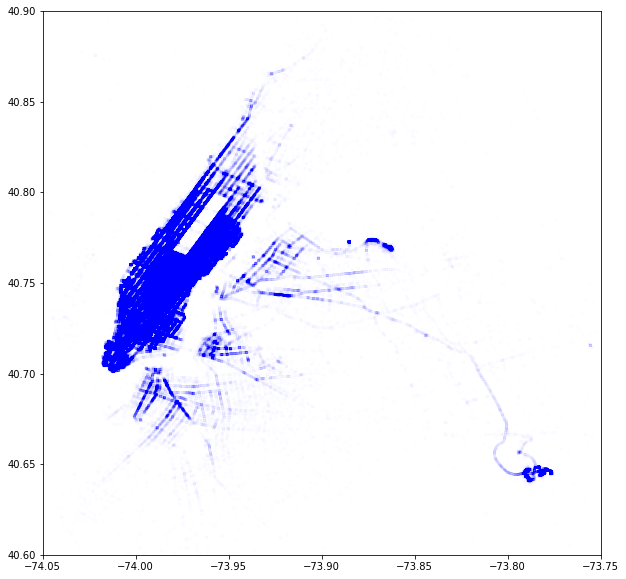

In [69]:
# Another attempt to visualize longitude and latitude: plot the map
plt.figure(figsize=(10, 10))
plt.plot(taxidata['pickup_longitude'],
         taxidata['pickup_latitude'],
         
         'b.',
         alpha=0.005)
plt.xlim(-74.05, -73.75)
plt.ylim(40.6, 40.9)

(40.6, 40.9)

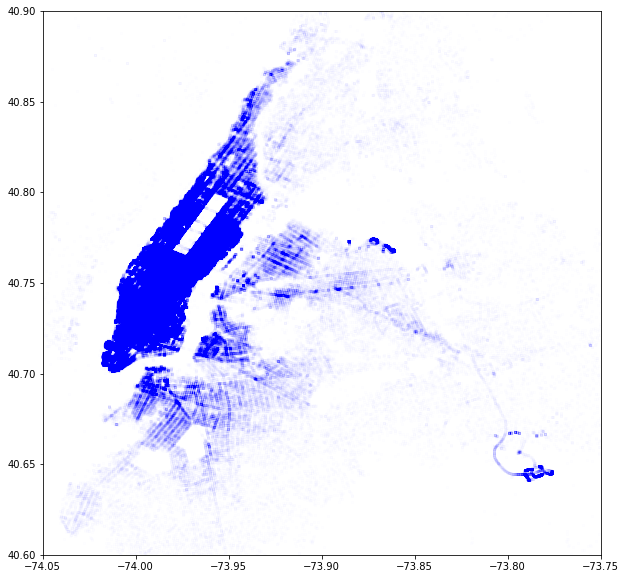

In [70]:
# Plot dropoff locations
plt.figure(figsize=(10, 10))
plt.plot(taxidata['dropoff_longitude'],
         taxidata['dropoff_latitude'],
         
         'b.',
         alpha=0.005)
plt.xlim(-74.05, -73.75)
plt.ylim(40.6, 40.9)

## Consistency Check
- Is dropoff_time always greater than pickup_time?
- Is the difference between dropoff_time and pickup_time equal to trip_duration?
- Is the difference between dropoff_time and pickup_time too large to be accurate?
- Is the difference between dropoff_time and pickup_time too small to be accurate?

In [71]:
# Is dropoff_time always greater than pickup_time?



In [72]:
# Is the difference between dropoff_time and pickup_time equal to trip_duration?



In [73]:
# Is the difference between dropoff_time and pickup_time too large to be accurate?



In [74]:
# Is the difference between dropoff_time and pickup_time too small to be accurate?



## Visualization Task 2: Correlations between a feature and trip_duration

In [75]:
# passenger count vs. trip duration



In [76]:
# pickup location vs. trip duration



In [77]:
# dropoff location vs. trip duration



## Feature engineering
The raw data usually is not the best way to provide useful features for a specific task. Therefore it is a crucial ability for a data scientist to create more meaningful features from the dataset.

- Hour of the day
- Day of the week
- Aerial distance

In [78]:
# hour of the day vs. trip duration

# Extract the hour value from pickup datetime
taxidata['pickup_hour'] = taxidata['pickup_datetime'].dt.hour
taxidata.head()

/Users/cloudburst/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13


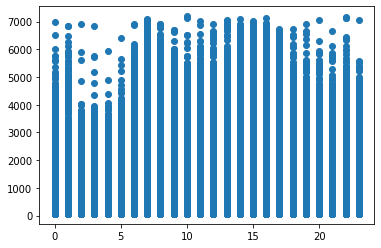

In [79]:
plt.scatter(taxidata['pickup_hour'], taxidata['trip_duration'])

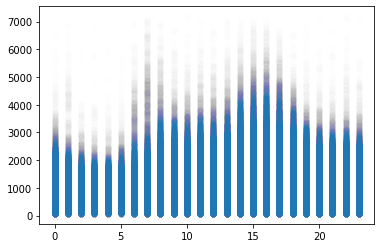

In [80]:
plt.scatter(taxidata['pickup_hour'], taxidata['trip_duration'], alpha=0.005)

- long trips (>4000 sec) tend to happen between 3PM and 6PM
- during late night (2AM to 5AM), trip tend to be less than 2000 sec)

In [83]:
# day of the week vs. trip duration
taxidata['dayofweek'] = taxidata['pickup_datetime'].dt.dayofweek
taxidata.head()

/Users/cloudburst/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,dayofweek,aerial_dist
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,0,0.017680
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,6,0.020456
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,1,0.059934
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,2,0.013438
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,5,0.010690


In [84]:
# Aerial distance vs. trip duration
taxidata['aerial_dist'] = np.sqrt((taxidata['pickup_longitude'] - taxidata['dropoff_longitude']) ** 2 \
                                 + (taxidata['pickup_latitude'] - taxidata['dropoff_latitude']) ** 2)


/Users/cloudburst/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 0.5)

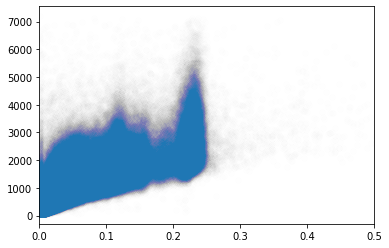

In [85]:
plt.scatter(taxidata['aerial_dist'], taxidata['trip_duration'], alpha=0.005)
plt.xlim(0, 0.5)

There is a strong correlation between areial distance and trip duration

In [86]:
print("Correlation coefficient:", np.corrcoef(taxidata['aerial_dist'], taxidata['trip_duration']))

Correlation coefficient: [[1.         0.73972708]
 [0.73972708 1.        ]]


In [87]:
# For each pair of features, calculate the correlation coefficient
taxidata.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,dayofweek,aerial_dist
vendor_id,1.000000,0.287176,0.017959,0.002462,0.006258,0.004709,0.006856,0.009149,0.001125,0.007680
passenger_count,0.287176,1.000000,0.005092,-0.005259,0.000497,-0.002762,0.013724,0.008977,0.025301,0.009542
pickup_longitude,0.017959,0.005092,1.000000,-0.143067,0.242868,0.048724,0.370037,0.019542,-0.030780,0.523484
pickup_latitude,0.002462,-0.005259,-0.143067,1.000000,0.055592,0.412040,-0.240296,0.013226,-0.034608,-0.308942
dropoff_longitude,0.006258,0.000497,0.242868,0.055592,1.000000,0.110003,0.222299,-0.042407,-0.001893,0.301209
dropoff_latitude,0.004709,-0.002762,0.048724,0.412040,0.110003,1.000000,-0.180421,0.015684,-0.023907,-0.156776
trip_duration,0.006856,0.013724,0.370037,-0.240296,0.222299,-0.180421,1.000000,0.028801,-0.034238,0.739727
pickup_hour,0.009149,0.008977,0.019542,0.013226,-0.042407,0.015684,0.028801,1.000000,-0.084193,-0.018515
dayofweek,0.001125,0.025301,-0.030780,-0.034608,-0.001893,-0.023907,-0.034238,-0.084193,1.000000,0.005322
aerial_dist,0.007680,0.009542,0.523484,-0.308942,0.301209,-0.156776,0.739727,-0.018515,0.005322,1.000000


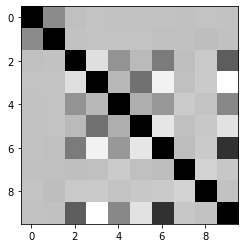

In [88]:
import matplotlib
correlations = taxidata.corr()
plt.imshow(correlations, cmap='binary')

The trip duration is affected by many factors at the same time, and thus a good prediction method should account for all these factors. To further investigate the problem of predicting taxi trip duration, one would need to develop multi-variate statistical models (strong assumption on the distribution of data) or machine learning models (weak assumption on the distribution of data). If you are interested, look into the discussion in the [notebook section on Kaggle.com](https://www.kaggle.com/c/nyc-taxi-trip-duration/notebooks).

## Annotations 

In [89]:
# Load the bitcoin price data
import json
import requests
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
data = pd.DataFrame(json.loads(res.content)['Data'])
data = data.set_index('time')
data.index = pd.to_datetime(data.index, unit='s')
data.tail(3)

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2019-11-10,9045.85,9126.98,8767.94,8822.19,18134.09,1.626492e+08
2019-11-11,8726.31,9084.49,8619.78,9045.85,25750.40,2.260356e+08
2019-11-12,8767.21,8868.85,8576.09,8726.31,18708.07,1.632888e+08


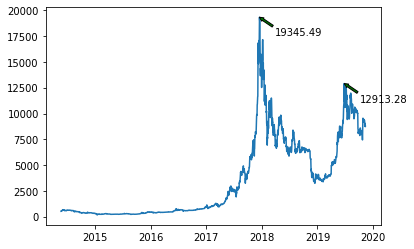

In [90]:
from datetime import datetime, timedelta
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(data['close'])

peaks = [
    (datetime(2017, 12, 16), '19345.49'),
    (datetime(2019, 6, 26), '12913.28')
]

for date, label in peaks:
    ax.annotate(label,
                xy=(date, data.asof(date)['close']),
                xytext=(date+timedelta(days=100), data.asof(date)['close']-1000),
                arrowprops=dict(facecolor='green', headwidth=4, width=2, headlength=4),
                horizontalalignment='left',
                verticalalignment='top')


In [91]:
# Get the maximum close price
max1 = data['close'].max()

# Get the data of maximum close price
index = (data['close'] == max1)
data_max1 = data[index]
date = data_max1.index
print(date)

# Get the second peak value
max2 = data[data.index > datetime(2019, 1, 1)]['close'].max()
data_max2 = data[data['close'] == max2]
date = data_max2.index
print(date)

DatetimeIndex(['2017-12-16'], dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2019-06-26'], dtype='datetime64[ns]', name='time', freq=None)


In [92]:
# Add low points to the figure
subdata = data[data.index > datetime(2018, 1 ,1)]
price = subdata['close'].min()
date = subdata['close'].argmin()
print(date)

2018-12-15 00:00:00


/Users/cloudburst/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  after removing the cwd from sys.path.


In [93]:
datetime(2018, 12, 15) - timedelta(days=100)

datetime.datetime(2018, 9, 6, 0, 0)

In [94]:
datetime(2018, 12, 15) - datetime(2017, 12, 16)

datetime.timedelta(days=364)

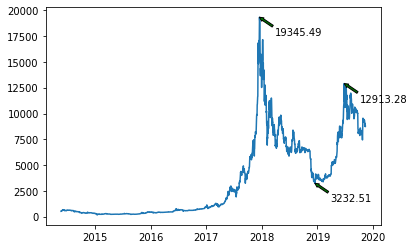

In [95]:
# Plot the price curve, add an arrow pointing to the valley
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(data.index, data['close'])

peaks = [
    (datetime(2017, 12, 16), '19345.49'),
    (datetime(2019, 6, 26), '12913.28'),
    (datetime(2018, 12, 15), str(price))
]

for date, label in peaks:
    ax1.annotate(label,
            xy=(date, data.asof(date)['close']),
            xytext=(date+timedelta(days=100), data.asof(date)['close']-1000),
            arrowprops=dict(facecolor='green', headwidth=4, width=2, headlength=4),
            horizontalalignment='left',
            verticalalignment='top')


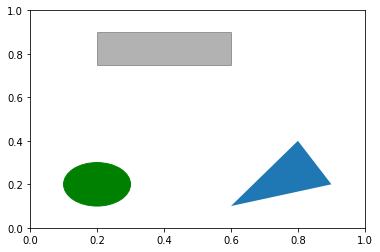

In [96]:
# Plot a rectangle, a circle, and a triangle
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.2, 0.2), radius=0.1, color='g')
triangle = plt.Polygon([[0.6, 0.1], [0.8, 0.4], [0.9, 0.2]])

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(triangle)

# The k-nearest neighbor method for prediction
- To make a prediction, find k existing data points that are closest to the given input.
- Use the average of the k nearest instances to form a prediction.

In [97]:
values = np.array([
    [100, 80, 95],
    [55, 60, 45],
    [70, 75, 90],
    [75, 70, 60],
    [60, 73, 75],
    [72, 63, 70]
])
data = pd.DataFrame(values,
                   columns=['Midterm', 'Project', 'Final'],
                   index=['Alex', 'Bob', 'Chris', 'Doug', 'Eva', "Frank"])
data

,Midterm,Project,Final
Alex,100,80,95
Bob,55,60,45
Chris,70,75,90
Doug,75,70,60
Eva,60,73,75
Frank,72,63,70


(50, 100)

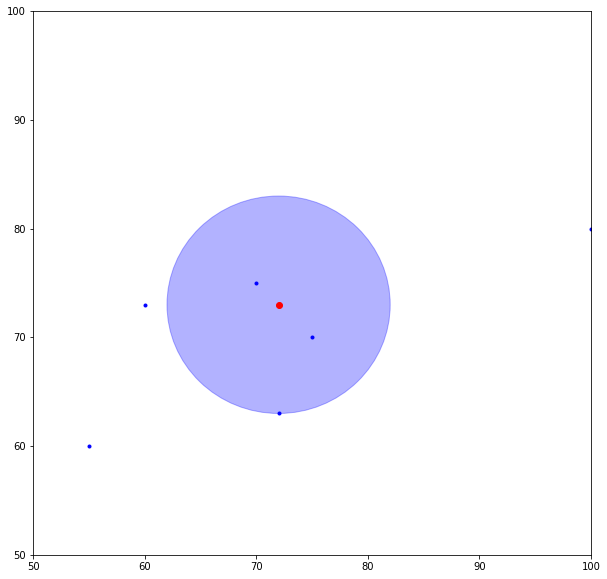

In [98]:
# New student: [72, 73, ?]
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
ax1.plot(data['Midterm'], data['Project'], 'b.')
ax1.plot(72, 73, 'ro')

# Set k=3, then find 3 students whose midterm and project scores are closest.
data['Distance'] = np.sqrt((data['Midterm'] - 72) ** 2 + (data['Project'] - 73) ** 2)
data

circ = plt.Circle((72, 73), radius=10, alpha=0.3, color='b')
ax1.add_patch(circ)
ax1.set_xlim([50, 100])
ax1.set_ylim([50, 100])

In [99]:
data

,Midterm,Project,Final,Distance
Alex,100,80,95,28.861739
Bob,55,60,45,21.400935
Chris,70,75,90,2.828427
Doug,75,70,60,4.242641
Eva,60,73,75,12.000000
Frank,72,63,70,10.000000


In [100]:
# extract instances whose project score is between 70 and 90
index = (data['Project'] > 70) & (data['Project'] < 90)
subdata = data[index]
subdata

,Midterm,Project,Final,Distance
Alex,100,80,95,28.861739
Chris,70,75,90,2.828427
Eva,60,73,75,12.000000


In [101]:
# Our predition is the average final grade of the k nearest students.
k = 3
idx_knearest = data['Distance'].values.argsort()[:k]
idx_names = data.index[idx_knearest]
# print(idx_knearest)
data_knearest = data.loc[idx_names, :]
prediction = data_knearest['Final'].mean()
print(prediction)

73.33333333333333


## Let's pretend this is the dataset for midterm project. Let's following the instructions:

In [2]:
import pandas as pd
import numpy as np

values = np.array([
    [100, 80, 95],
    [55, 60, 45],
    [70, 75, 90],
    [75, 70, 60],
    [60, 73, 75],
    [72, 63, 70]
])
data = pd.DataFrame(values,
                   columns=['Midterm', 'Project', 'Final'],
                   index=['Alex', 'Bob', 'Chris', 'Doug', 'Eva', "Frank"])
data

,Midterm,Project,Final
Alex,100,80,95
Bob,55,60,45
Chris,70,75,90
Doug,75,70,60
Eva,60,73,75
Frank,72,63,70


In [3]:
# 1. Normalize the training set. (new value = (old value - mean) / standard deviation)
cols = ['Midterm', 'Project', 'Final']

means = {}
stds = {}

for col in cols:
    mean = data[col].mean()
    std = data[col].std()
    data[col] = (data[col] - mean) / std
    means[col] = mean
    stds[col] = std
    
data

,Midterm,Project,Final
Alex,1.785215,1.307436,1.206994
Bob,-1.083880,-1.351756,-1.475215
Chris,-0.127515,0.642638,0.938773
Doug,0.191273,-0.022160,-0.670552
Eva,-0.765092,0.376719,0.134110
Frank,0.000000,-0.952877,-0.134110


In [4]:
data.std()

Midterm    1.0
Project    1.0
Final      1.0
dtype: float64

In [5]:
data.mean()

Midterm    0.000000e+00
Project   -6.106227e-16
Final      1.850372e-17
dtype: float64

In [6]:
means

{'Midterm': 72.0, 'Project': 70.16666666666667, 'Final': 72.5}

In [7]:
stds

{'Midterm': 15.684387141358123,
 'Project': 7.5210814825174355,
 'Final': 18.641351882307248}

In [8]:
# 2. new instance y = [72, 73, ?]. 
y = pd.DataFrame(data=np.array([[72, 73, np.nan]]), columns=data.columns)
y

,Midterm,Project,Final
0,72.0,73.0,NaN


In [9]:
# Normalize y using means and stds calculated above
# col = "Midterm"
# print(means[col])
# print(stds[col])
for col in cols:
    y[col] = (y[col] - means[col]) / stds[col]
y

,Midterm,Project,Final
0,0.0,0.376719,NaN


In [10]:
# Find the k nearest neighbors
# Diff = square root of sum of squares of column-wise differences

x = data.loc["Alex"]
x
# Difference between x and y
diff_midterm = x['Midterm'] - y['Midterm']
diff_project = x['Project'] - y['Project']
diff = np.sqrt((x['Midterm'] - y['Midterm']) ** 2 + (x['Project'] - y['Project']) ** 2)
print("Difference between Alex and y:", diff.values)

Difference between Alex and y: [2.01326263]


In [110]:
data.loc['Alex', 'Diff'] = diff.values[0]
data

,Midterm,Project,Final,Diff
Alex,1.785215,1.307436,1.206994,2.013263
Bob,-1.083880,-1.351756,-1.475215,NaN
Chris,-0.127515,0.642638,0.938773,NaN
Doug,0.191273,-0.022160,-0.670552,NaN
Eva,-0.765092,0.376719,0.134110,NaN
Frank,0.000000,-0.952877,-0.134110,NaN


In [111]:
# Use a for loop to calculate the difference for all students
known_cols = ['Midterm', 'Project']
for student in data.index:
    x = data.loc[student] # x represents an instance from data
#     diff = np.sqrt((x['Midterm'] - y['Midterm']) ** 2 + (x['Project'] - y['Project']) ** 2)
    diff = np.sqrt(np.sum(x[known_cols] - y[known_cols]) ** 2)
    data.loc[student, 'Diff'] = diff.values[0]
data

,Midterm,Project,Final,Diff
Alex,1.785215,1.307436,1.206994,1.785215
Bob,-1.083880,-1.351756,-1.475215,1.083880
Chris,-0.127515,0.642638,0.938773,0.127515
Doug,0.191273,-0.022160,-0.670552,0.191273
Eva,-0.765092,0.376719,0.134110,0.765092
Frank,0.000000,-0.952877,-0.134110,0.000000


In [112]:
# Find the k(k=3) closest students (their diff should be smallest)
data = data.sort_values(by='Diff')

# Extract the top 3 rows
sub_data = data.loc[data.index[:3]]
sub_data

# The prediction is the average target value from the k nearest neighbors
prediction = sub_data['Final'].mean()
print(prediction)

# The prediction is transformed using the normalization formula
# Let's tranform it back
prediction_original = prediction * stds['Final'] + means['Final']
print(prediction_original)

0.04470348173215166
73.33333333333333


## Apply kNN method to the trip data

In [113]:
# New instance has longitude, lattitude: -73.98812866	40.73202896	-73.99017334	40.75667953

# For each known instance calculate the distance towards this instance
taxidata['Distance'] = np.sqrt(
    (taxidata['pickup_longitude'] - (-73.98)) ** 2 + \
    (taxidata['pickup_latitude'] - 40.73) ** 2 + \
    (taxidata['dropoff_longitude'] - (-73.99)) ** 2 +\
    (taxidata['dropoff_latitude'] - 40.76) ** 2
)

/Users/cloudburst/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
taxidata['Distance']

0          0.046031
1          0.031554
2          0.062283
3          0.065862
4          0.069588
5          0.016679
6          0.044641
7          0.096279
8          0.034740
9          0.037351
10         0.045069
11         0.041752
12         0.032144
13         0.050800
14         0.030399
15         0.062634
16         0.045440
17         0.043474
18         0.032894
19         0.033407
20         0.029863
21         0.035129
22         0.038472
23         0.061906
24         0.239553
25         0.056791
26         0.055303
27         0.093511
28         0.071522
29         0.127562
             ...   
1458614    0.045343
1458615    0.054877
1458616    0.028861
1458617    0.031349
1458618    0.032098
1458619    0.059319
1458620    0.042349
1458621    0.057286
1458622    0.047951
1458623    0.039752
1458624    0.033383
1458625    0.032771
1458626    0.062835
1458627    0.051745
1458628    0.036725
1458629    0.115517
1458630    0.022532
1458631    0.057778
1458632    0.044070


In [115]:
# Find 3 closest instances
idx = taxidata['Distance'].values.argsort()[:3]
subdata = taxidata.loc[idx, :]
prediction = subdata['trip_duration'].mean()
print(prediction)

802.3333333333334


# Homework
The JFK international airport is located within longitude -73.82 to -73.78 and latitude 40.63 to 40.67. Extract all taxi trips who picked up passengers from this area.
1. For this sub-dataset only, visualize the correlation between the aerial distance and the trip duration.
2. For this sub-dataset only, visualize the drop-off location using dropoff_longitude and dropoff_latitude.
3. There was a snow storm on Jan 23, 2016. Is the distribution of trip_duration on that day different from the rest of the year?

In [124]:
# JFK international airport is located within longitude -73.82 to -73.78 and latitude 40.63 to 40.67
# JFK's Exact Longitude & Latitude is: 40.64, -73.77

# Extract all taxi trips who picked up passengers from this area.

# Longitude -73.82 to -73.78:

index_jfk1 = (taxidata['pickup_longitude'] > -73.82) & (taxidata['pickup_longitude'] < -73.78)
subdata = taxidata[index_jfk1]
subdata

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,dayofweek,aerial_dist,Distance
55,id3827863,2,2016-04-19 11:29:08,2016-04-19 12:27:56,3,-73.792892,40.657879,-73.809189,40.690182,N,3528,11,1,0.036181,0.278887
86,id0283075,1,2016-04-06 23:42:26,2016-04-07 00:12:08,1,-73.782478,40.644646,-73.981125,40.720886,N,1782,23,2,0.212775,0.218881
98,id2102594,1,2016-03-30 16:14:29,2016-03-30 17:01:33,1,-73.789841,40.643559,-73.970665,40.687279,N,2824,16,2,0.186035,0.222025
102,id0105610,1,2016-02-19 20:01:24,2016-02-19 20:35:49,3,-73.789719,40.643707,-73.978699,40.750343,N,2065,20,4,0.216990,0.209462
104,id3508035,2,2016-06-06 20:13:56,2016-06-06 20:45:20,6,-73.788132,40.641460,-73.971771,40.749409,N,1884,20,0,0.213017,0.212361
231,id1868620,2,2016-06-18 00:41:28,2016-06-18 01:10:34,1,-73.781860,40.644684,-73.961922,40.767033,N,1746,0,5,0.217695,0.217660
268,id1636593,2,2016-04-25 17:37:13,2016-04-25 18:23:12,1,-73.790154,40.646614,-73.981918,40.756680,N,2759,17,0,0.221107,0.207536
319,id1703171,2,2016-01-30 22:42:51,2016-01-30 23:23:44,5,-73.786217,40.645287,-73.993073,40.729729,N,2453,22,5,0.223427,0.213668
354,id3402983,2,2016-06-30 15:48:06,2016-06-30 17:31:13,1,-73.781898,40.644772,-73.985893,40.760159,N,6187,15,3,0.234367,0.215696
370,id2904820,1,2016-03-20 22:51:45,2016-03-20 23:14:07,1,-73.782425,40.644287,-73.856583,40.725502,N,1342,22,6,0.109978,0.255681


In [125]:
# Latitude 40.63 to 40.67:

index_jfk2 = (taxidata['pickup_latitude'] > 40.63) & (taxidata['pickup_latitude'] < 40.67)
subdata = taxidata[index_jfk2]
subdata

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,dayofweek,aerial_dist,Distance
55,id3827863,2,2016-04-19 11:29:08,2016-04-19 12:27:56,3,-73.792892,40.657879,-73.809189,40.690182,N,3528,11,1,0.036181,0.278887
86,id0283075,1,2016-04-06 23:42:26,2016-04-07 00:12:08,1,-73.782478,40.644646,-73.981125,40.720886,N,1782,23,2,0.212775,0.218881
98,id2102594,1,2016-03-30 16:14:29,2016-03-30 17:01:33,1,-73.789841,40.643559,-73.970665,40.687279,N,2824,16,2,0.186035,0.222025
102,id0105610,1,2016-02-19 20:01:24,2016-02-19 20:35:49,3,-73.789719,40.643707,-73.978699,40.750343,N,2065,20,4,0.216990,0.209462
104,id3508035,2,2016-06-06 20:13:56,2016-06-06 20:45:20,6,-73.788132,40.641460,-73.971771,40.749409,N,1884,20,0,0.213017,0.212361
231,id1868620,2,2016-06-18 00:41:28,2016-06-18 01:10:34,1,-73.781860,40.644684,-73.961922,40.767033,N,1746,0,5,0.217695,0.217660
268,id1636593,2,2016-04-25 17:37:13,2016-04-25 18:23:12,1,-73.790154,40.646614,-73.981918,40.756680,N,2759,17,0,0.221107,0.207536
319,id1703171,2,2016-01-30 22:42:51,2016-01-30 23:23:44,5,-73.786217,40.645287,-73.993073,40.729729,N,2453,22,5,0.223427,0.213668
354,id3402983,2,2016-06-30 15:48:06,2016-06-30 17:31:13,1,-73.781898,40.644772,-73.985893,40.760159,N,6187,15,3,0.234367,0.215696
370,id2904820,1,2016-03-20 22:51:45,2016-03-20 23:14:07,1,-73.782425,40.644287,-73.856583,40.725502,N,1342,22,6,0.109978,0.255681


(40.63, 40.67)

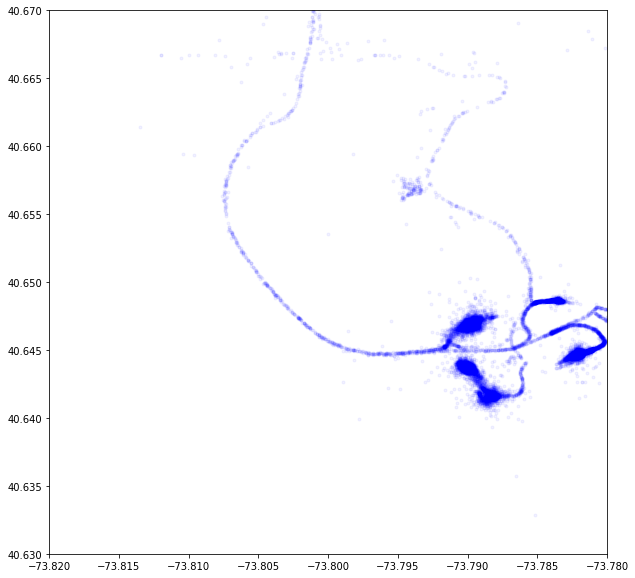

In [126]:
# Visualization the pick-up location using pickup_longitude and pickup_latitude.

plt.figure(figsize=(10, 10))
plt.plot(taxidata['pickup_longitude'],
         taxidata['pickup_latitude'],
         
         'b.',
         alpha=0.05)
plt.xlim(-73.82, -73.78)
plt.ylim(40.63, 40.67)

In [127]:
print("Correlation coefficient:", np.corrcoef(taxidata['aerial_dist'], taxidata['trip_duration']))

Correlation coefficient: [[1.         0.73972708]
 [0.73972708 1.        ]]


(0, 0.5)

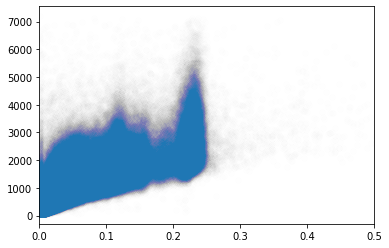

In [128]:
# 1. For this sub-dataset only, visualize the correlation between the aerial distance and the trip duration.

plt.scatter(taxidata['aerial_dist'], taxidata['trip_duration'], alpha=0.005)
plt.xlim(0, 0.5)
 

(40.63, 40.67)

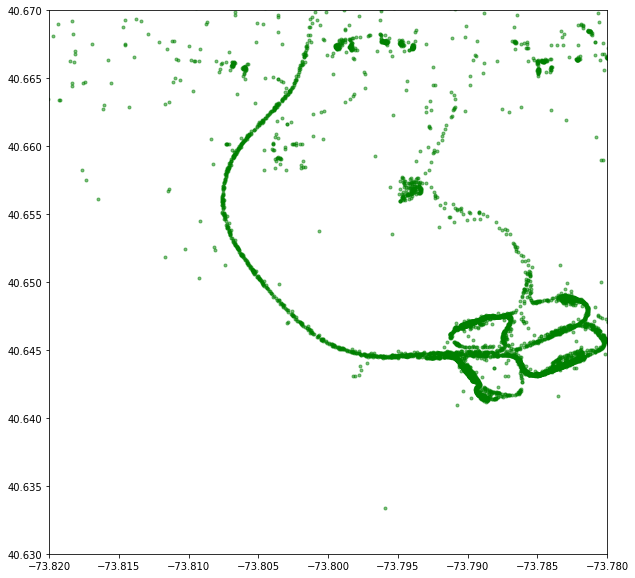

In [129]:
# 2. For this sub-dataset only, visualize the drop-off location using dropoff_longitude and dropoff_latitude.

plt.figure(figsize=(10, 10))
plt.plot(taxidata['dropoff_longitude'],
         taxidata['dropoff_latitude'],
         
         'g.',
         alpha=0.5)
plt.xlim(-73.82, -73.78)
plt.ylim(40.63, 40.67)

Text(0.5, 1.0, '2')

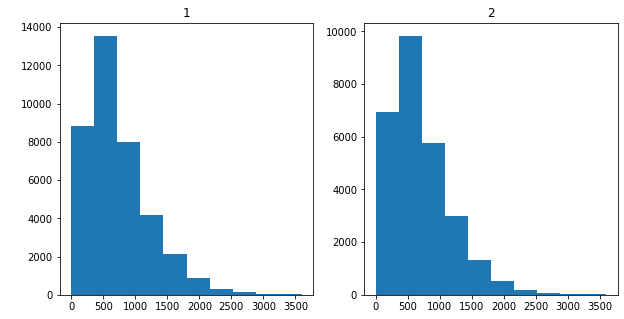

In [130]:
# There was a snow storm on Jan 23, 2016 

# 3. Is the distribution of trip_duration on that day different from the rest of the year?

index_id1 = (taxidata['pickup_hour'] == 1)
taxidata_id1 = taxidata[index_id1]

index_id2 = (taxidata['pickup_hour'] == 2)
taxidata_id2 = taxidata[index_id2]

# Show the historgram of trip duration
# plt.hist(taxidata_id1['trip_duration'], range=(0, 3600)) # need to remove the outliners first
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(taxidata_id1['trip_duration'], range=(0, 3600))
ax1.set_title("1")
ax1.set_ylabel(" ")
ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(taxidata_id2['trip_duration'], range=(0, 3600))
ax2.set_title("2")

In [131]:
taxidata['pickup_hour'] = taxidata['pickup_datetime'].dt.hour
taxidata

/Users/cloudburst/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,dayofweek,aerial_dist,Distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,0,0.017680,0.046031
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,6,0.020456,0.031554
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,1,0.059934,0.062283
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,2,0.013438,0.065862
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,5,0.010690,0.069588
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,22,5,0.011572,0.016679
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,22,4,0.014133,0.044641
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,7,5,0.059801,0.096279
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,23,4,0.014790,0.034740
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,21,3,0.046355,0.037351
